In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
%matplotlib inline
plt.style.use('seaborn')

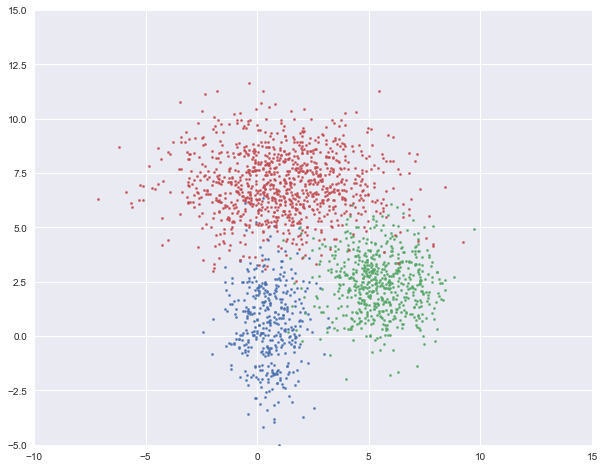

In [4]:
# 第一簇的数据
num1, mu1, var1 = 400, [0.5, 0.5], [1, 3]
X1 = np.random.multivariate_normal(mu1, np.diag(var1), num1)
# 第二簇的数据
num2, mu2, var2 = 600, [5.5, 2.5], [2, 2]
X2 = np.random.multivariate_normal(mu2, np.diag(var2), num2)
# 第三簇的数据
num3, mu3, var3 = 1000, [1, 7], [6, 2]
X3 = np.random.multivariate_normal(mu3, np.diag(var3), num3)
# 合并在一起
X = np.vstack((X1, X2, X3))
plt.figure(figsize=(10, 8))
plt.axis([-10, 15, -5, 15])
plt.scatter(X1[:, 0], X1[:, 1], s=5)
plt.scatter(X2[:, 0], X2[:, 1], s=5)
plt.scatter(X3[:, 0], X3[:, 1], s=5)
plt.show()

** 初始化变量 **  
首先对GMM模型参数以及隐变量进行初始化  
n_clusters是GMM模型中聚类的个数，和K-Means一样我们需要提前确定！！  
n_points是样本点的个数  
Mu是每个高斯分布的均值  
Var是每个高斯分布的方差，为了过程简便，我们这里假设协方差矩阵都是对角阵。  
Gamma_head是隐变量，也就是每个样本属于每一簇的概率，在初始时，我们可以认为每个样本属于某一簇的概率都是1/3  
Alpha是每一簇的比重，可以根据W求得，在初始时，Pi = 1/3, 1/3, 1/3  

In [28]:
n_clusters = 3
n_points = len(X)
Mu = [[0, -1], [6, 0], [0, 9]]
Var = [[1, 1], [1, 1], [1, 1]]
Alpha = [1 / n_clusters] * 3
Gamma_head= np.ones((n_points, n_clusters)) / n_clusters 
Alpha = W.sum(axis=0) / W.sum()

** E步骤 **  
计算分模型k对观测数据y_i的影响度 

In [25]:
#对应于书上P186的E步
def update_Gamma_head(X, Mu, Var, Alpha):
    n_points, n_clusters = len(X), len(Alpha)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i])) #高斯分布
    Gamma_head = pdfs / pdfs.sum(axis=1).reshape(-1, 1)  #将数据变成1列，
    return Gamma_head

** M步骤 **  
计算新一轮迭代的模型参数

In [26]:
def update_Mu(X, Gamma_head):
    n_clusters = Gamma_head.shape[1]
    Mu = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Mu[i] = np.average(X, axis=0, weights=Gamma_head[:, i])
    return Mu

def update_Var(X, Mu, Gamma_headW):
    n_clusters = W.shape[1]
    Var = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Var[i] = np.average((X - Mu[i]) ** 2, axis=0, weights=Gamma_head[:, i])
    return Var

def update_Alpha(Gamma_head):
    Alpha = Gamma_head.sum(axis=0) / Gamma_head.sum()
    return Alpha


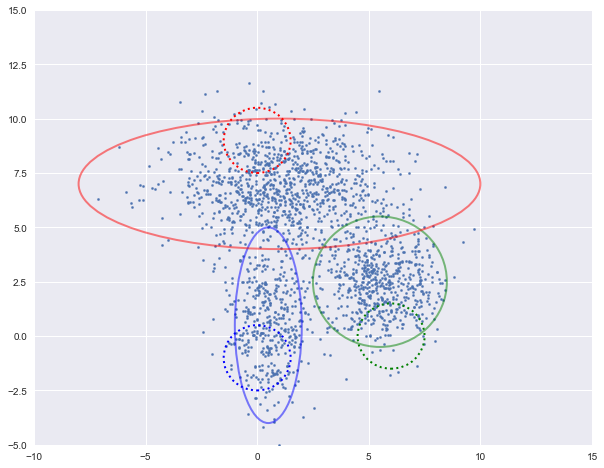

log-likehood:-8.041


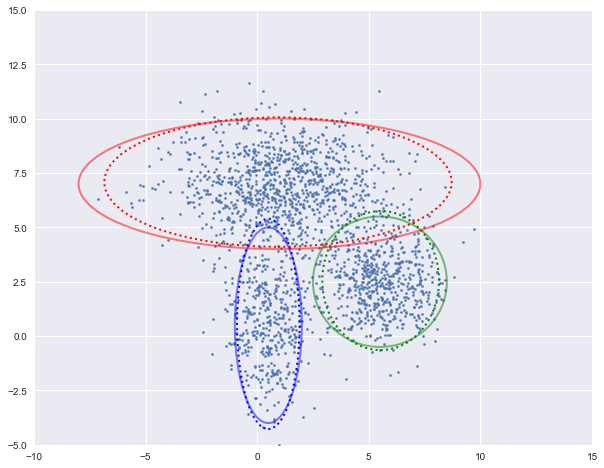

log-likehood:-4.709


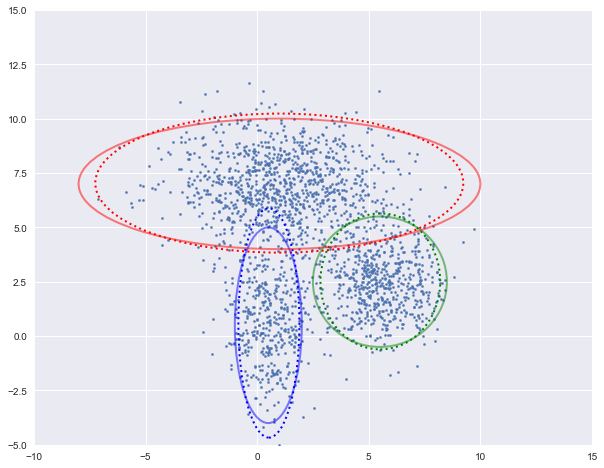

log-likehood:-4.706


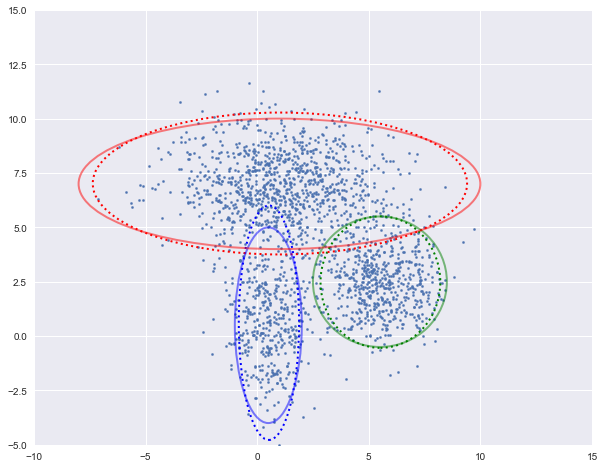

log-likehood:-4.705


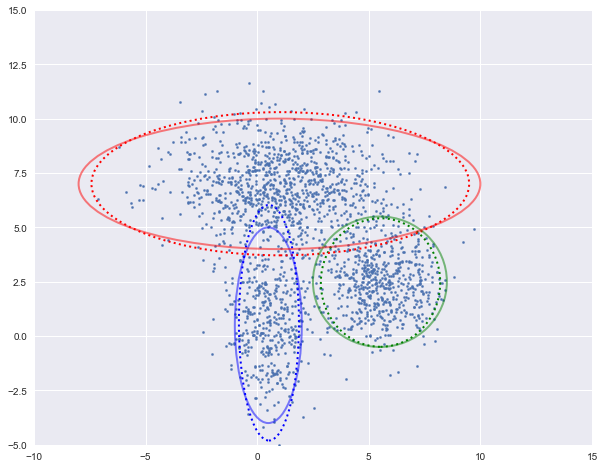

log-likehood:-4.705


In [27]:
loglh = []
for i in range(5):
    plot_clusters(X, Mu, Var, [mu1, mu2, mu3], [var1, var2, var3])
    loglh.append(logLH(X, Alpha, Mu, Var))
    Gamma_head = update_W(X, Mu, Var, Alpha)
    Alpha = update_Alpha(Gamma_head)
    Mu = update_Mu(X, Gamma_head)
    print('log-likehood:%.3f'%loglh[-1])
    Var = update_Var(X, Mu, Gamma_head)
    
def logLH(X, Alpha, Mu, Var):
    n_points, n_clusters = len(X), len(Alpha)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Alpha[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i]))
    return np.mean(np.log(pdfs.sum(axis=1)))

def plot_clusters(X, Mu, Var, Mu_true=None, Var_true=None):
    colors = ['b', 'g', 'r']
    n_clusters = len(Mu)
    plt.figure(figsize=(10, 8))
    plt.axis([-10, 15, -5, 15])
    plt.scatter(X[:, 0], X[:, 1], s=5)
    ax = plt.gca()
    for i in range(n_clusters):
        plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'ls': ':'}
        ellipse = Ellipse(Mu[i], 3 * Var[i][0], 3 * Var[i][1], **plot_args)
        ax.add_patch(ellipse)
    if (Mu_true is not None) & (Var_true is not None):
        for i in range(n_clusters):
            plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'alpha': 0.5}
            ellipse = Ellipse(Mu_true[i], 3 * Var_true[i][0], 3 * Var_true[i][1], **plot_args)
            ax.add_patch(ellipse)         
    plt.show()